Traitement et ebtrainement du mod√®l 

In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import albumentations as A
from albumentations.pytorch import ToTensorV2

#  Chemins
DATASET_PATH = r'C:\Users\smour\Documents\HACKATHON\hackaton2025\archive2\train'
OUTPUT_PATH = r'C:\Users\smour\Documents\HACKATHON\hackaton2025\archive4_preprocessed\train'

IMG_SIZE = 48  # Taille standardis√©e
TARGET_IMAGES_PER_CLASS = 25000  # Objectif par classe
IS_GRAYSCALE = False  # True si noir & blanc, False si couleur

# ‚úÖ Augmentations
augmentations = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.Rotate(limit=15, p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=10, p=0.5),
    A.GaussNoise(p=0.2),
])

#  V√©rifier si une image est corrompue
def is_valid_image(file_path):
    try:
        img = cv2.imread(file_path)
        if img is None:
            return False
        return True
    except Exception:
        return False

#  Charger et pr√©traiter une image
def process_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE if IS_GRAYSCALE else cv2.IMREAD_COLOR)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    
    if IS_GRAYSCALE:
        img = np.expand_dims(img, axis=-1)  # Assurer format (48, 48, 1)
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Assurer format RGB
    
    img = img.astype(np.float32) / 255.0  # Normalisation
    return img

#  Fonction pour traiter le dataset en reprenant l√† o√π il s'est arr√™t√©
def clean_and_balance_dataset(source_path, output_path):
    os.makedirs(output_path, exist_ok=True)

    for class_name in os.listdir(source_path):
        class_path = os.path.join(source_path, class_name)
        output_class_path = os.path.join(output_path, class_name)
        
        if not os.path.isdir(class_path):
            continue  # Ignore fichiers non dossiers

        os.makedirs(output_class_path, exist_ok=True)
        
        # V√©rifier le nombre d'images d√©j√† sauvegard√©es pour cette classe
        existing_files = [f for f in os.listdir(output_class_path) if f.endswith('.png')]
        current_count = len(existing_files)
        print(f"{class_name}: {current_count} images d√©j√† pr√©sentes.")
        
        # Si la classe est d√©j√† compl√®te, passer √† la suivante
        if current_count >= TARGET_IMAGES_PER_CLASS:
            print(f"Classe {class_name} d√©j√† compl√®te.")
            continue
        
        images = []
        valid_files = [f for f in os.listdir(class_path) if is_valid_image(os.path.join(class_path, f))]
        
        # Charger les images originales (jusqu'√† TARGET_IMAGES_PER_CLASS)
        for file in tqdm(valid_files, desc=f"Chargement {class_name}"):
            file_path = os.path.join(class_path, file)
            img = process_image(file_path)
            images.append(img)
            if len(images) >= TARGET_IMAGES_PER_CLASS:
                break
        
        # Si le nombre d'images originales est insuffisant, g√©n√©rer des images suppl√©mentaires
        if len(images) < TARGET_IMAGES_PER_CLASS:
            print(f"Classe {class_name} sous-repr√©sent√©e: g√©n√©ration d'images suppl√©mentaires.")
            while len(images) < TARGET_IMAGES_PER_CLASS:
                augmented_images = []
                for img in images:
                    augmented = augmentations(image=img)["image"]
                    augmented_images.append(augmented)
                    if len(images) + len(augmented_images) >= TARGET_IMAGES_PER_CLASS:
                        break
                images = np.concatenate((images, np.array(augmented_images)), axis=0)
        
        # Sauvegarde des images manquantes
        for idx in range(current_count, TARGET_IMAGES_PER_CLASS):
            img = images[idx]
            img_save = (img * 255).astype(np.uint8)
            output_file = os.path.join(output_class_path, f"{idx}.png")
            cv2.imwrite(output_file, img_save)
        
        print(f" {class_name}: ajout de {TARGET_IMAGES_PER_CLASS - current_count} images.")

# üöÄ Traitement du dataset d'entra√Ænement
clean_and_balance_dataset(DATASET_PATH, OUTPUT_PATH)
print("üéØ Dataset nettoy√© et √©quilibr√© avec succ√®s !")


c:\Users\smour\Documents\HACKATHON\.venv\Lib\site-packages\albumentations\core\validation.py:87: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


0: 25000 images d√©j√† pr√©sentes.
Classe 0 d√©j√† compl√®te.
1: 25000 images d√©j√† pr√©sentes.
Classe 1 d√©j√† compl√®te.
2: 25000 images d√©j√† pr√©sentes.
Classe 2 d√©j√† compl√®te.
3: 0 images d√©j√† pr√©sentes.


Chargement 3: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14090/14090 [00:47<00:00, 294.37it/s]


Classe 3 sous-repr√©sent√©e: g√©n√©ration d'images suppl√©mentaires.
‚úÖ 3: ajout de 25000 images.
4: 0 images d√©j√† pr√©sentes.


Chargement 4: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6378/6378 [00:15<00:00, 412.63it/s]


Classe 4 sous-repr√©sent√©e: g√©n√©ration d'images suppl√©mentaires.
‚úÖ 4: ajout de 25000 images.
5: 0 images d√©j√† pr√©sentes.


Chargement 5: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3803/3803 [00:14<00:00, 262.54it/s]


Classe 5 sous-repr√©sent√©e: g√©n√©ration d'images suppl√©mentaires.
‚úÖ 5: ajout de 25000 images.
6: 0 images d√©j√† pr√©sentes.


Chargement 6: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 24882/24882 [06:54<00:00, 60.00it/s]


Classe 6 sous-repr√©sent√©e: g√©n√©ration d'images suppl√©mentaires.
‚úÖ 6: ajout de 25000 images.
üéØ Dataset nettoy√© et √©quilibr√© avec succ√®s !


In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm
from PIL import Image
import albumentations as A

#  Chemins
VAL_DATASET_PATH = r'C:\Users\smour\Documents\HACKATHON\hackaton2025\archive2\val'
OUTPUT_VAL_PATH = r'C:\Users\smour\Documents\HACKATHON\hackaton2025\archive4_preprocessed\val'

IMG_SIZE = 48  # Taille standardis√©e
TARGET_IMAGES_PER_CLASS = 1500  # Objectif par classe
IS_GRAYSCALE = True  # Mettre False si on veut de la couleur

# Augmentations pour compl√©ter les classes sous-repr√©sent√©es
augmentations = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.Rotate(limit=15, p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=10, p=0.5),
    A.GaussNoise(p=0.2),
])

# V√©rification des images corrompues
def is_valid_image(file_path):
    try:
        img = Image.open(file_path)
        img.verify()
        return True
    except Exception:
        return False

# Chargement et pr√©traitement des images
def process_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE if IS_GRAYSCALE else cv2.IMREAD_COLOR)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Redimensionner
    if IS_GRAYSCALE:
        img = np.expand_dims(img, axis=-1)  # Format (48, 48, 1)
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Assurer format RGB
    img = img.astype(np.float32) / 255.0  # Normalisation entre 0 et 1
    return img

# Fonction pour traiter le dataset de validation en reprenant l√† o√π il s'est arr√™t√©
def clean_and_balance_dataset(source_path, output_path):
    os.makedirs(output_path, exist_ok=True)

    for class_name in os.listdir(source_path):
        class_path = os.path.join(source_path, class_name)
        output_class_path = os.path.join(output_path, class_name)
        
        if not os.path.isdir(class_path):
            continue  # Ignore les fichiers non dossiers

        os.makedirs(output_class_path, exist_ok=True)
        
        # V√©rifier combien d'images sont d√©j√† pr√©sentes
        existing_files = [f for f in os.listdir(output_class_path) if f.endswith('.png')]
        current_count = len(existing_files)
        print(f"{class_name}: {current_count} images d√©j√† pr√©sentes.")
        
        if current_count >= TARGET_IMAGES_PER_CLASS:
            print(f"Classe {class_name} d√©j√† compl√®te.")
            continue

        images = []
        valid_files = [f for f in os.listdir(class_path) if is_valid_image(os.path.join(class_path, f))]
        
        #  √âtape 1 : Charger les images originales jusqu'√† TARGET_IMAGES_PER_CLASS ou moins
        for file in tqdm(valid_files, desc=f"Traitement {class_name}"):
            file_path = os.path.join(class_path, file)
            img = process_image(file_path)
            images.append(img)
            if len(images) >= TARGET_IMAGES_PER_CLASS:
                break
        
        #  √âtape 2 : Si la classe est sous-repr√©sent√©e, g√©n√©rer des images suppl√©mentaires
        while len(images) < TARGET_IMAGES_PER_CLASS:
            augmented_images = []
            for img in images:
                augmented = augmentations(image=img)["image"]
                augmented_images.append(augmented)
                if len(images) + len(augmented_images) >= TARGET_IMAGES_PER_CLASS:
                    break
            images = np.concatenate((images, np.array(augmented_images)), axis=0)

        # Sauvegarde uniquement des images manquantes
        for idx in range(current_count, TARGET_IMAGES_PER_CLASS):
            img = images[idx]
            img_save = (img * 255).astype(np.uint8)  # Conversion en entier
            output_file = os.path.join(output_class_path, f"{idx}.png")
            cv2.imwrite(output_file, img_save)

        print(f" {class_name}: sauvegard√© {TARGET_IMAGES_PER_CLASS - current_count} images suppl√©mentaires")

#  Traitement du dataset de validation
clean_and_balance_dataset(VAL_DATASET_PATH, OUTPUT_VAL_PATH)
print(" Dataset de validation nettoy√© et √©quilibr√© avec succ√®s (reprise possible)!")


0: 0 images d√©j√† pr√©sentes.


Traitement 0: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 500/500 [00:01<00:00, 331.32it/s]


‚úÖ 0: sauvegard√© 1500 images suppl√©mentaires
1: 0 images d√©j√† pr√©sentes.


Traitement 1: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 500/500 [00:01<00:00, 315.76it/s]


‚úÖ 1: sauvegard√© 1500 images suppl√©mentaires
2: 0 images d√©j√† pr√©sentes.


Traitement 2: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 500/500 [00:01<00:00, 480.15it/s]


‚úÖ 2: sauvegard√© 1500 images suppl√©mentaires
3: 0 images d√©j√† pr√©sentes.


Traitement 3: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 500/500 [00:01<00:00, 448.24it/s]


‚úÖ 3: sauvegard√© 1500 images suppl√©mentaires
4: 0 images d√©j√† pr√©sentes.


Traitement 4: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 500/500 [00:01<00:00, 442.38it/s]


‚úÖ 4: sauvegard√© 1500 images suppl√©mentaires
5: 0 images d√©j√† pr√©sentes.


Traitement 5: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 500/500 [00:01<00:00, 386.90it/s]


‚úÖ 5: sauvegard√© 1500 images suppl√©mentaires
6: 0 images d√©j√† pr√©sentes.


Traitement 6: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 500/500 [00:01<00:00, 331.73it/s]


‚úÖ 6: sauvegard√© 1500 images suppl√©mentaires
üéØ Dataset de validation nettoy√© et √©quilibr√© avec succ√®s (reprise possible)!


Found 175000 images belonging to 7 classes.
Found 10500 images belonging to 7 classes.


c:\Users\smour\Documents\HACKATHON\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ conv2d (Conv2D)                 ‚îÇ (None, 46, 46, 32)     ‚îÇ           896 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d (MaxPooling2D)    ‚îÇ (None, 23, 23, 32)     ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_1 (Conv2D)               ‚îÇ (None, 21, 21, 64)     ‚îÇ        18,496 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_1 (MaxPooling2D)  ‚îÇ (None, 10, 10, 64)     ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_2 (Conv2D)               ‚îÇ (None, 8, 8, 128)      ‚îÇ        73,856 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_2 (MaxPooling2D)  ‚îÇ (None, 4, 4, 128)      ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ flatten (Flatten)               ‚îÇ (None, 2048)           ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                   ‚îÇ (None, 128)            ‚îÇ       262,272 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)               ‚îÇ (None, 128)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)                 ‚îÇ (None, 7)              ‚îÇ           903 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 356,423 (1.36 MB)

 Trainable params: 356,423 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

c:\Users\smour\Documents\HACKATHON\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
5468/5468 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 276ms/step - accuracy: 0.3280 - loss: 1.6465
Epoch 1: val_accuracy improved from -inf to 0.32279, saving model to best_emotion_model.h5


5468/5468 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1615s 295ms/step - accuracy: 0.3280 - loss: 1.6465 - val_accuracy: 0.3228 - val_loss: 2.6476 - learning_rate: 0.0010
Epoch 2/30
   1/5468 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1:44 19ms/step - accuracy: 0.4375 - loss: 1.3603

c:\Users\smour\Documents\HACKATHON\.venv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy improved from 0.32279 to 0.32308, saving model to best_emotion_model.h5


5468/5468 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 2ms/step - accuracy: 0.4375 - loss: 1.3603 - val_accuracy: 0.3231 - val_loss: 2.6734 - learning_rate: 0.0010
Epoch 3/30
5468/5468 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 61ms/step - accuracy: 0.4881 - loss: 1.3170
Epoch 3: val_accuracy improved from 0.32308 to 0.32631, saving model to best_emotion_model.h5


5468/5468 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 346s 63ms/step - accuracy: 0.4881 - loss: 1.3170 - val_accuracy: 0.3263 - val_loss: 2.8263 - learning_rate: 0.0010
Epoch 4/30
   1/5468 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1:40 18ms/step - accuracy: 0.5625 - loss: 1.0355
Epoch 4: val_accuracy improved from 0.32631 to 0.32746, saving model to best_emotion_model.h5


5468/5468 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 977us/step - accuracy: 0.5625 - loss: 1.0355 - val_accuracy: 0.3275 - val_loss: 2.8522 - learning_rate: 0.0010
Epoch 5/30
5468/5468 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 37ms/step - accuracy: 0.5137 - loss: 1.2553
Epoch 5: val_accuracy improved from 0.32746 to 0.33575, saving model to best_emotion_model.h5


5468/5468 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 213s 39ms/step - accuracy: 0.5137 - loss: 1.2553 - val_accuracy: 0.3357 - val_loss: 2.9250 - learning_rate: 0.0010
Epoch 6/30
   1/5468 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1:35 17ms/step - accuracy: 0.4375 - loss: 1.4566
Epoch 6: val_accuracy did not improve from 0.33575
5468/5468 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 951us/step - accuracy: 0.4375 - loss: 1.4566 - val_accuracy: 0.3354 - val_loss: 2.8983 - learning_rate: 0.0010
Epoch 7/30
5468/5468 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 38ms/step - accuracy: 0.5281 - loss: 1.2186
Epoch 7: val_accuracy improved from 0.33575 to 0.33880, saving model to best_emotion_model.h5


5468/5468 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 220s 40ms/step - accuracy: 0.5281 - loss: 1.2186 - val_accuracy: 0.3388 - val_loss: 2.8325 - learning_rate: 0.0010
Epoch 8/30
   1/5468 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1:49 20ms/step - accuracy: 0.4688 - loss: 1.1982
Epoch 8: val_accuracy did not improve from 0.33880
5468/5468 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 909us/step - accuracy: 0.4688 - loss: 1.1982 - val_accuracy: 0.3349 - val_loss: 2.8982 - learning_rate: 0.0010
Epoch 9/30
5468/5468 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 39ms/step - accuracy: 0.5408 - loss: 1.1900
Epoch 9: val_accuracy did not improve from 0.33880
5468/5468 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 220s 40ms/step - accuracy: 0.5408 - loss: 1.1900 - val_accuracy: 0.3265 - val_loss: 3.4150 - learning_rate: 0.0010
Epoch 10/30
   1/5468 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

5468/5468 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 148s 27ms/step - accuracy: 0.5587 - loss: 1.1440 - val_accuracy: 0.3417 - val_loss: 3.1517 - learning_rate: 5.0000e-04
Epoch 12/30
   1/5468 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1:22 15ms/step - accuracy: 0.5625 - loss: 1.1306
Epoch 12: val_accuracy improved from 0.34165 to 0.34232, saving model to best_emotion_model.h5


5468/5468 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 853us/step - accuracy: 0.5625 - loss: 1.1306 - val_accuracy: 0.3423 - val_loss: 3.1211 - learning_rate: 5.0000e-04
Epoch 13/30
5467/5468 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 30ms/step - accuracy: 0.5716 - loss: 1.1109
Epoch 13: val_accuracy did not improve from 0.34232
5468/5468 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 173s 32ms/step - accuracy: 0.5716 - loss: 1.1109 - val_accuracy: 0.3397 - val_loss: 3.2545 - learning_rate: 5.0000e-04
Epoch 14/30
   1/5468 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2:24 27ms/step - accuracy: 0.5000 - loss: 1.0347
Epoch 14: val_accuracy did not improve from 0.34232
5468/5468 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 1ms/step - accuracy: 0.5000 - loss: 1.0347 - val_accuracy: 0.3384 - val_loss: 3.2829 - learning_rate: 5.0000e-04
Epoch 15/30
5467/5468 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

5468/5468 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 218s 40ms/step - accuracy: 0.5783 - loss: 1.0983 - val_accuracy: 0.3478 - val_loss: 3.2087 - learning_rate: 5.0000e-04
Epoch 16/30
   1/5468 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1:54 21ms/step - accuracy: 0.5938 - loss: 1.0010
Epoch 16: val_accuracy improved from 0.34785 to 0.34804, saving model to best_emotion_model.h5


5468/5468 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 1ms/step - accuracy: 0.5938 - loss: 1.0010 - val_accuracy: 0.3480 - val_loss: 3.2100 - learning_rate: 5.0000e-04
Epoch 17/30
5468/5468 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 36ms/step - accuracy: 0.5833 - loss: 1.0794
Epoch 17: val_accuracy improved from 0.34804 to 0.36023, saving model to best_emotion_model.h5


5468/5468 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 201s 37ms/step - accuracy: 0.5833 - loss: 1.0794 - val_accuracy: 0.3602 - val_loss: 3.0941 - learning_rate: 5.0000e-04
Epoch 18/30
   1/5468 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1:55 21ms/step - accuracy: 0.5625 - loss: 1.1082
Epoch 18: val_accuracy did not improve from 0.36023
5468/5468 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 1000us/step - accuracy: 0.5625 - loss: 1.1082 - val_accuracy: 0.3599 - val_loss: 3.0767 - learning_rate: 5.0000e-04
Epoch 19/30
5468/5468 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 26ms/step - accuracy: 0.5846 - loss: 1.0743
Epoch 19: val_accuracy did not improve from 0.36023
5468/5468 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 154s 28ms/step - accuracy: 0.5846 - loss: 1.0743 - val_accuracy: 0.3563 - val_loss: 3.5220 - learning_rate: 5.0000e-04
Epoch 20/30
   1/5468 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

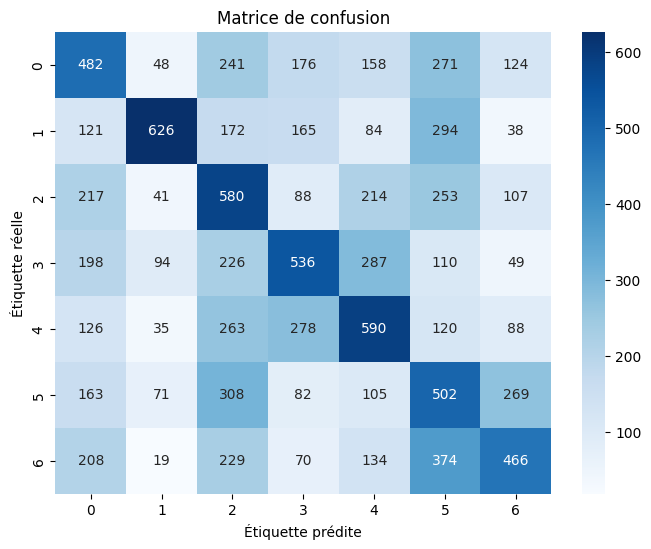

Rapport de classification :
              precision    recall  f1-score   support

           0       0.32      0.32      0.32      1500
           1       0.67      0.42      0.51      1500
           2       0.29      0.39      0.33      1500
           3       0.38      0.36      0.37      1500
           4       0.38      0.39      0.38      1500
           5       0.26      0.33      0.29      1500
           6       0.41      0.31      0.35      1500

    accuracy                           0.36     10500
   macro avg       0.39      0.36      0.37     10500
weighted avg       0.39      0.36      0.37     10500



In [7]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

#  Chemins vers les donn√©es pr√©trait√©es
TRAIN_DIR = r'C:\Users\smour\Documents\HACKATHON\hackaton2025\archive4_preprocessed\train'
VAL_DIR   = r'C:\Users\smour\Documents\HACKATHON\hackaton2025\archive4_preprocessed\val'

# Param√®tres
IMG_SIZE = 48
BATCH_SIZE = 32
EPOCHS = 30
# Exemple: si vous avez 7 classes (ex: 0,1,2,3,4,5,6)
NUM_CLASSES = 7

# Cr√©ation des g√©n√©rateurs d'images
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen   = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    VAL_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # Important pour conserver l'ordre des √©tiquettes
)

# Construction d'un mod√®le CNN simple
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, restore_best_weights=True),
    ModelCheckpoint("best_emotion_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True),
    ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, verbose=1)
]

# Entra√Ænement
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=callbacks
)

# √âvaluation finale sur le jeu de validation
val_loss, val_acc = model.evaluate(val_generator, verbose=1)
print(f"Pr√©cision de validation finale : {val_acc*100:.2f}%")

# --- Calcul et affichage de la matrice de confusion et du rapport de classification ---

# Pr√©dictions sur l'ensemble de validation
# (Utilisez suffisamment d'√©tapes pour couvrir toutes les images)
Y_pred = model.predict(val_generator, steps=(val_generator.samples // BATCH_SIZE) + 1)
y_pred = np.argmax(Y_pred, axis=1)

# V√©ritables √©tiquettes
y_true = val_generator.classes

# Calcul de la matrice de confusion
cm = confusion_matrix(y_true, y_pred)

# Affichage avec seaborn
plt.figure(figsize=(8, 6))
class_names = list(val_generator.class_indices.keys())
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("√âtiquette pr√©dite")
plt.ylabel("√âtiquette r√©elle")
plt.title("Matrice de confusion")
plt.show()

# Affichage du rapport de classification
print("Rapport de classification :")
print(classification_report(y_true, y_pred, target_names=class_names))

# Sauvegarde finale du mod√®le (optionnel)
model.save("final_emotion_model.h5")


In [8]:
#sauvegarde du mod√®le
import os
import tensorflow as tf
from tensorflow.keras.models import load_model

# Chemin de sauvegarde
MODEL_PATH = "finalFS_emotion_model.h5"
